## K562, H3K27ac test set, bpnet architecture


## ENCSR000AKP

In [73]:
import h5py 

In [74]:
f.close()

In [75]:
f=h5py.File("6kb/k562.h3k27ac.seed.1234.cs.25.filters.500.naive.range.4.6.to.11.5.0.predictions",'r')

In [76]:
labels_0=f['lab_0'][:]
labels_1=f['lab_1'][:]
pred_0=f['pred_0'][:]
pred_1=f['pred_1'][:]
coord=f['coords'][:]

In [77]:
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]

In [78]:
outf=open("tmp.txt",'w')
for entry in coord_fixed: 
    outf.write(str(entry)+'\n')
outf.close()

In [79]:
coord_dict={} 
for i in range(len(coord_fixed)): 
    coord_dict[tuple(coord_fixed[i])]=i

In [80]:
import pandas as pd 
from scipy.stats import spearmanr 
from scipy.stats import pearsonr 
from scipy.special import softmax

## get ranked list of IDR peaks on chrom 1 (test chrom)

In [81]:
idr_peaks=pd.read_csv('test.set.0.sorted.bed',header=None,sep='\t')
idr_peaks['summit']=idr_peaks[1]+idr_peaks[9]
idr_peaks=idr_peaks.sort_values(by=[8],ascending=False)
positions=[]
top_peaks=20
count=0
for index,row in idr_peaks.iterrows(): 
    summit=row['summit']
    chrom=row[0]
    count+=1
    if count >top_peaks: 
        break
    positions.append((chrom,str(summit),'.'))
        

In [82]:
positions[0]

('chr1', '44820122', '.')

In [83]:
coord_dict[positions[0]]

1859

In [84]:
## for plotting 
import matplotlib 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"]=10,5

In [85]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

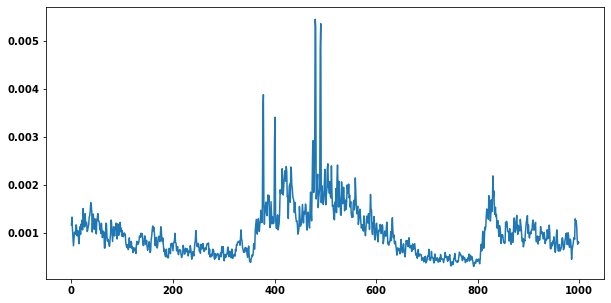

In [86]:
plt.plot(softmax(pred_0[0,:,0]))
#plt.plot(pred_0_softmax[0,:,0])

In [87]:
pred_0_softmax=softmax(pred_0,axis=1)

In [88]:
pred_0_softmax.shape

(5578, 1000, 2)

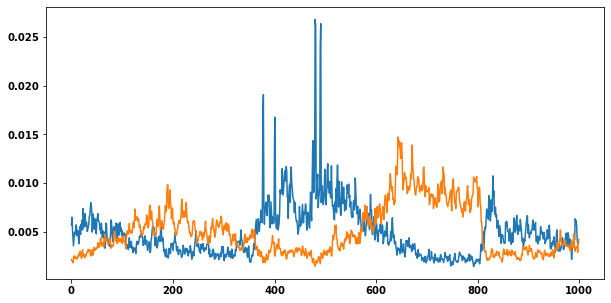

In [89]:
plt.plot(pred_0_softmax[0,:,0]*pred_1[0,0])
plt.plot(pred_0_softmax[0,:,1]*pred_1[0,1])


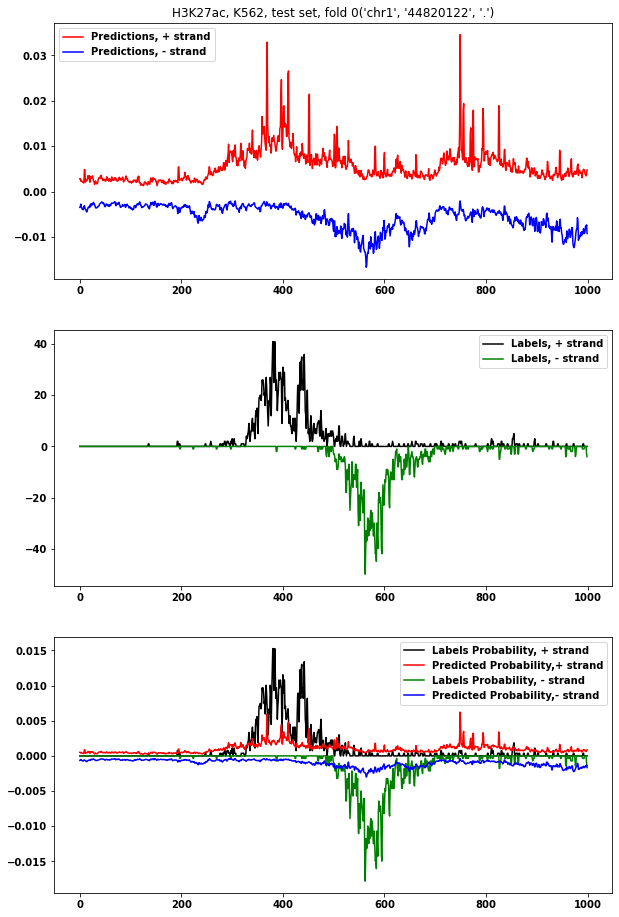

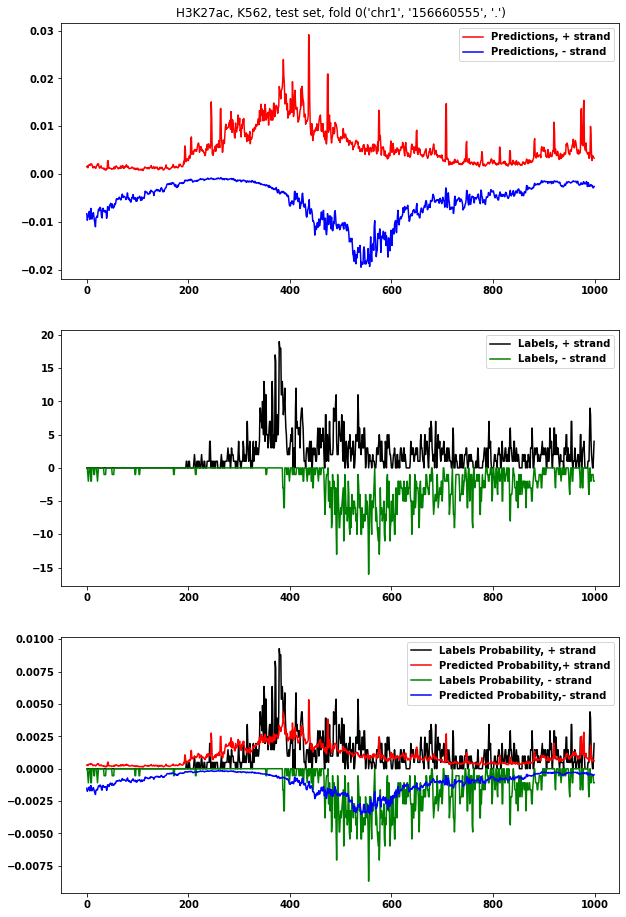

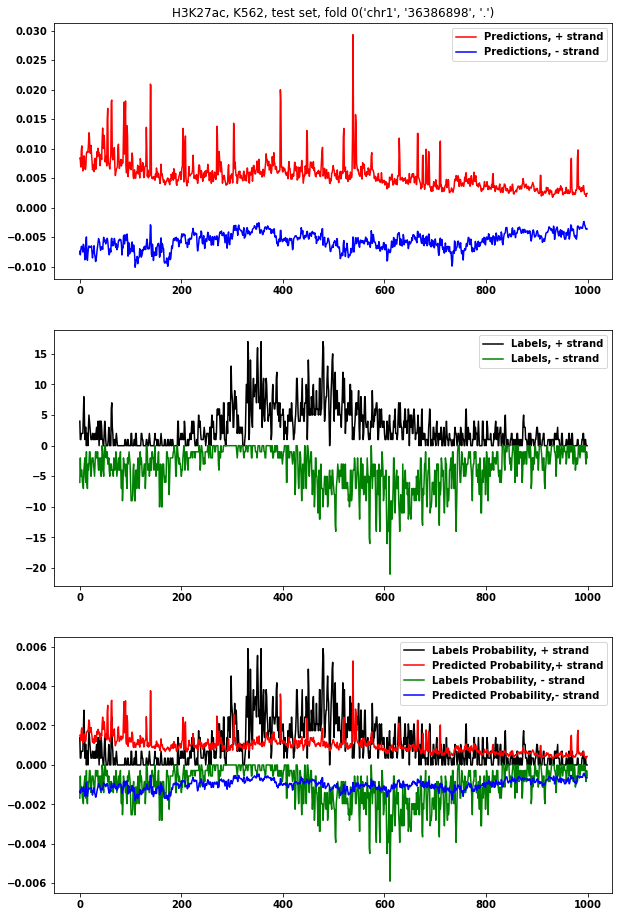

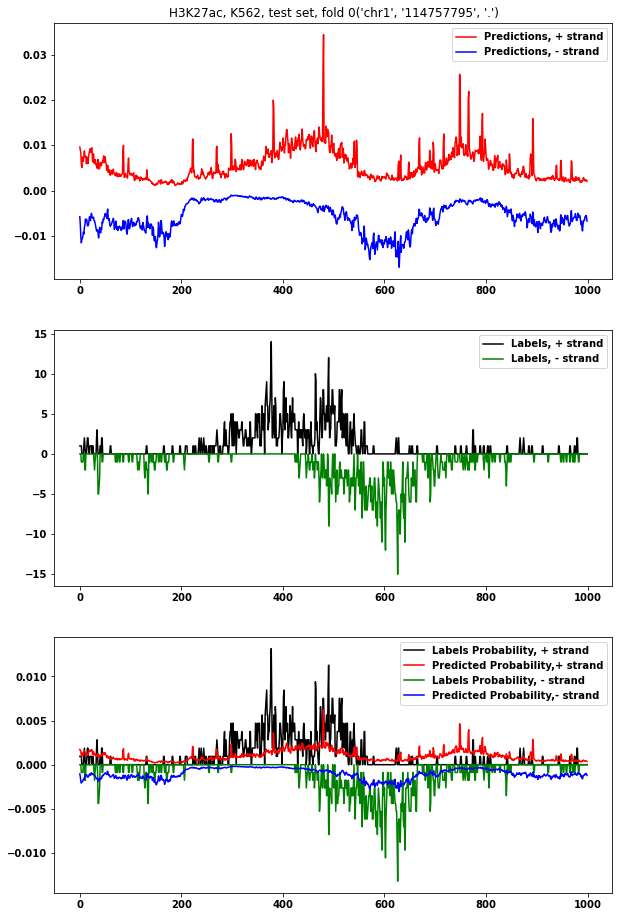

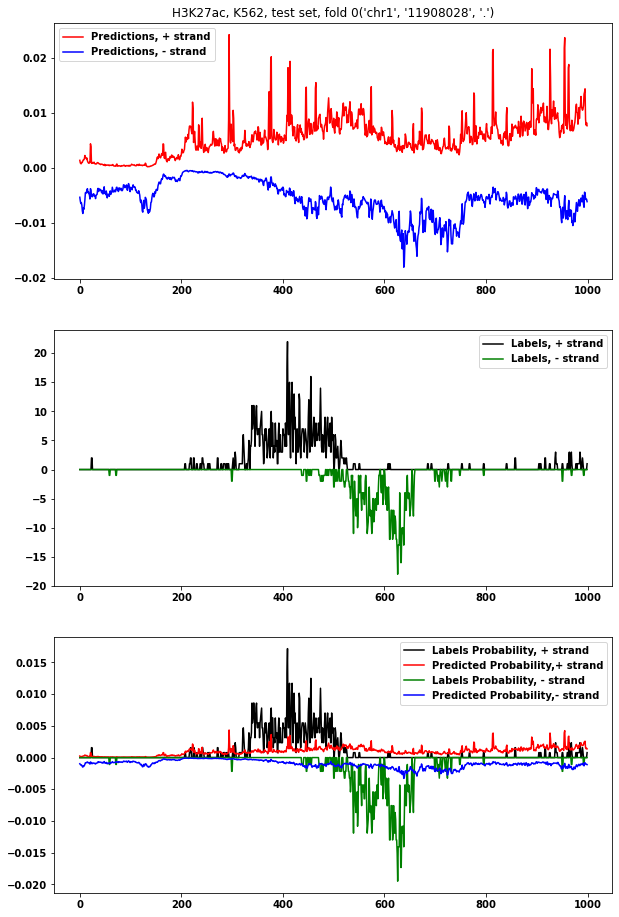

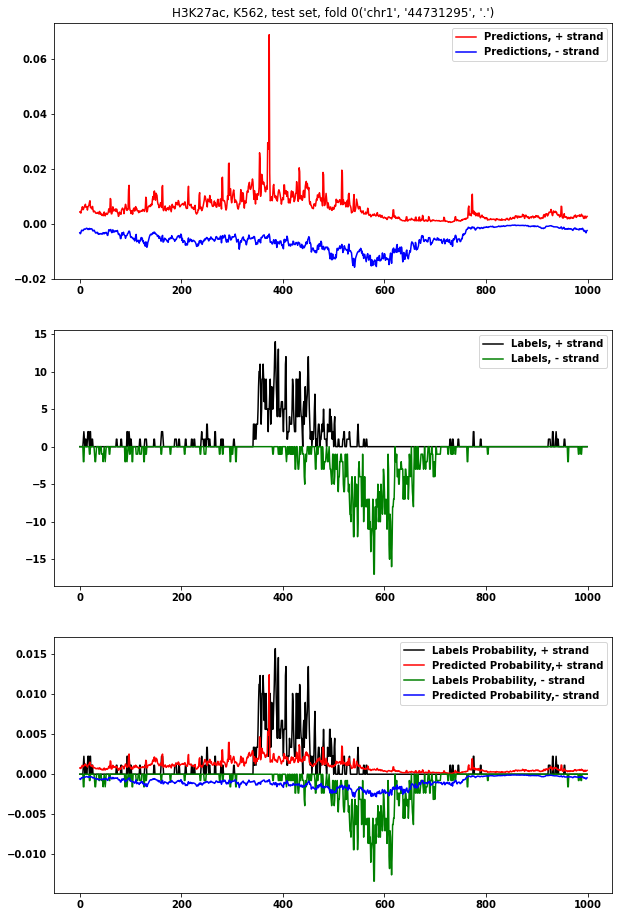

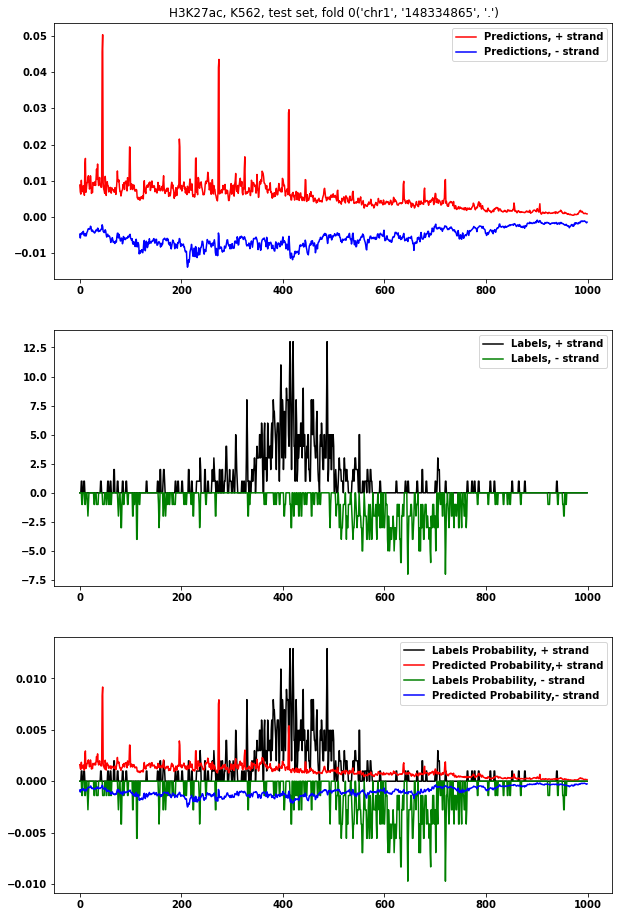

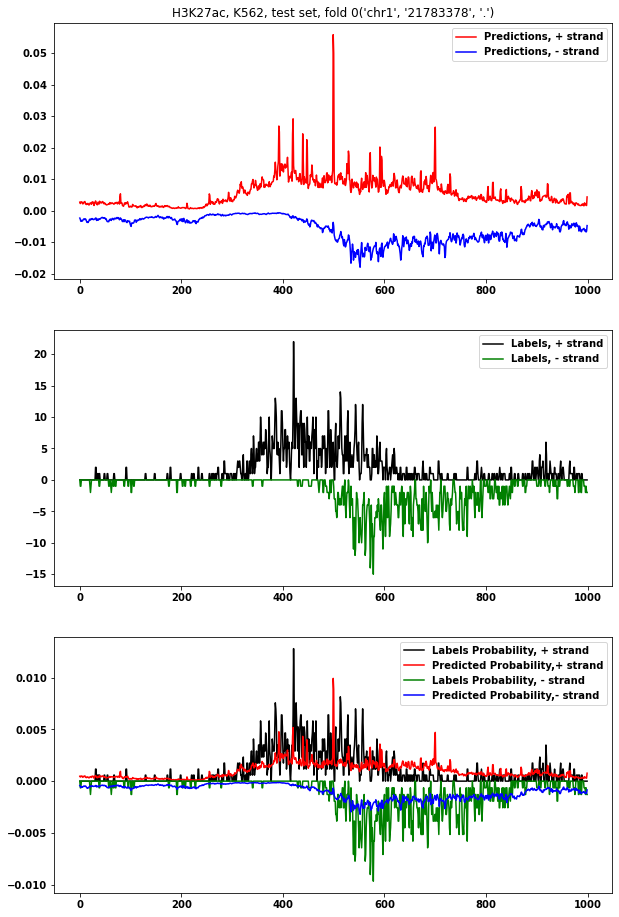

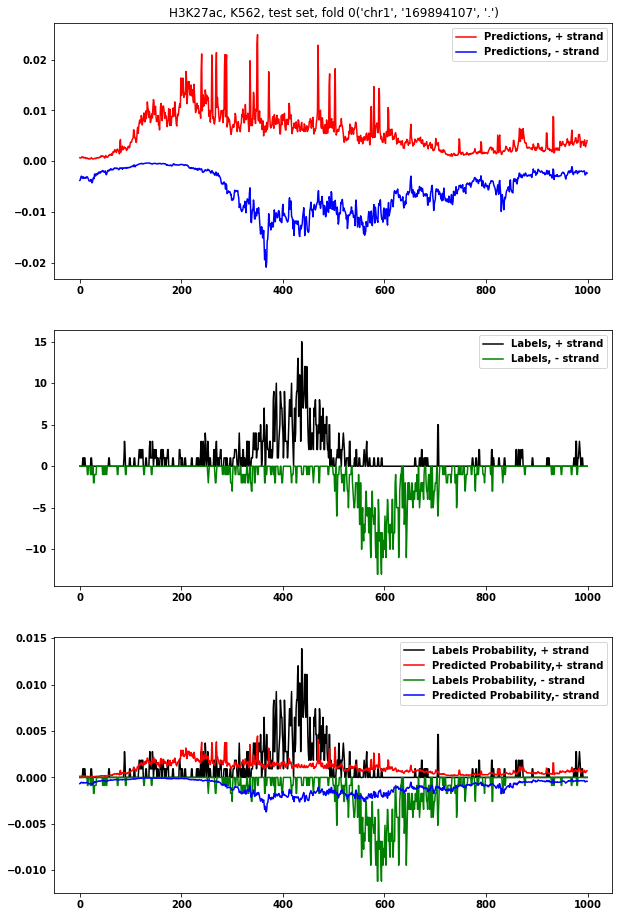

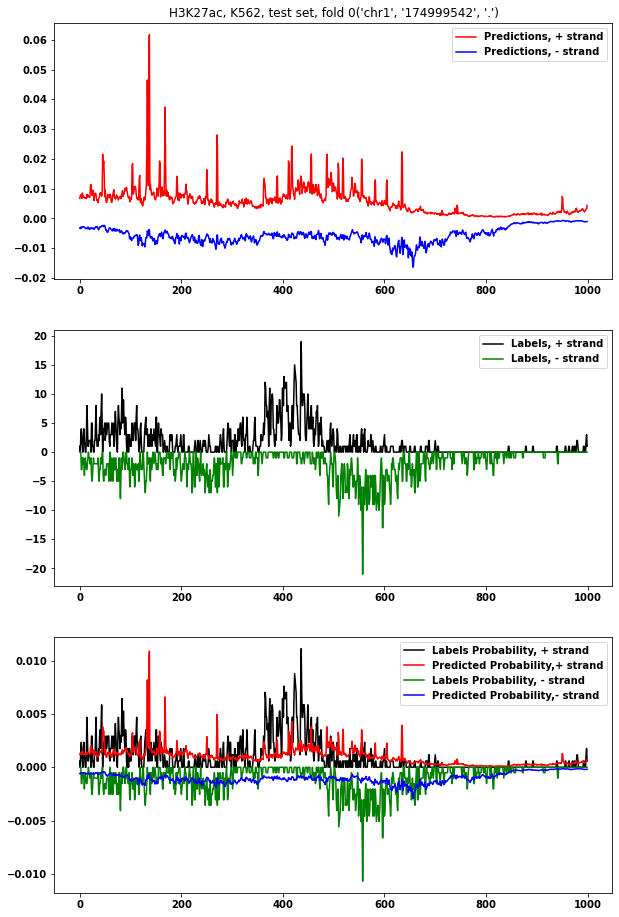

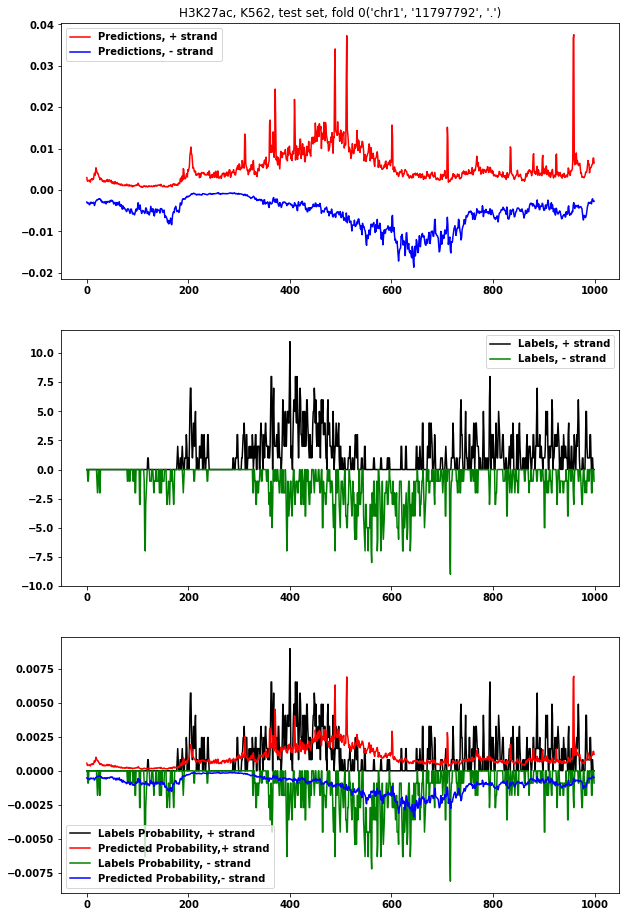

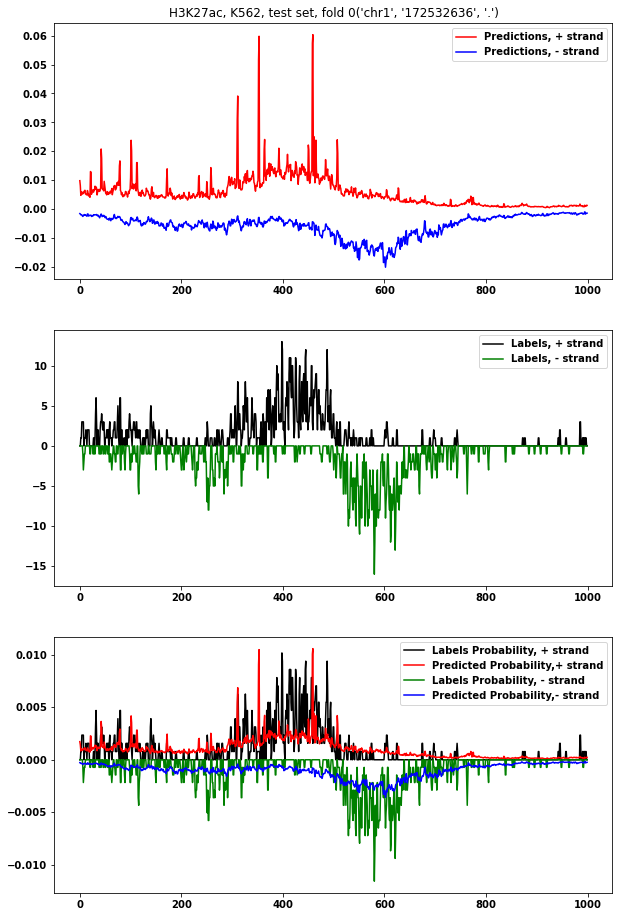

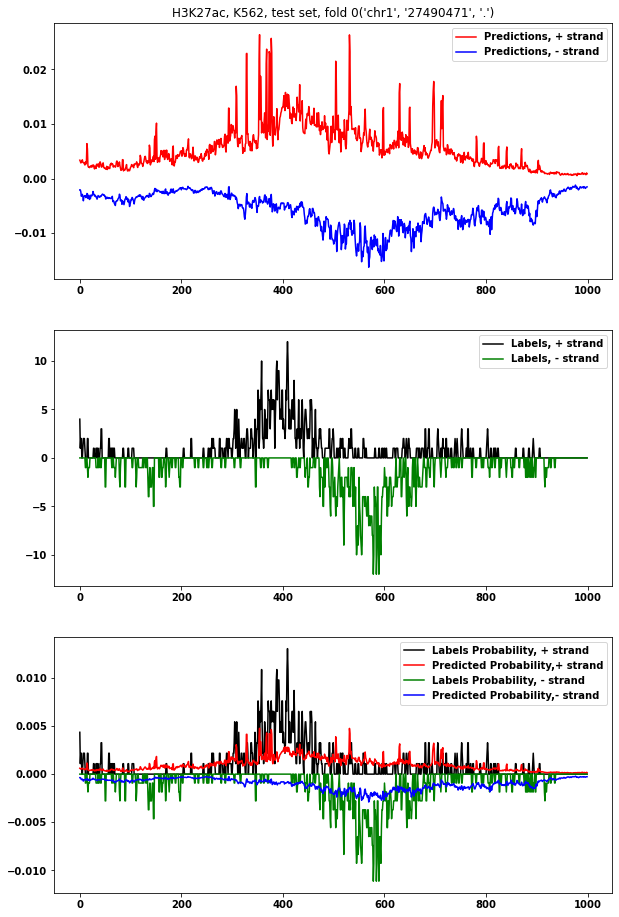

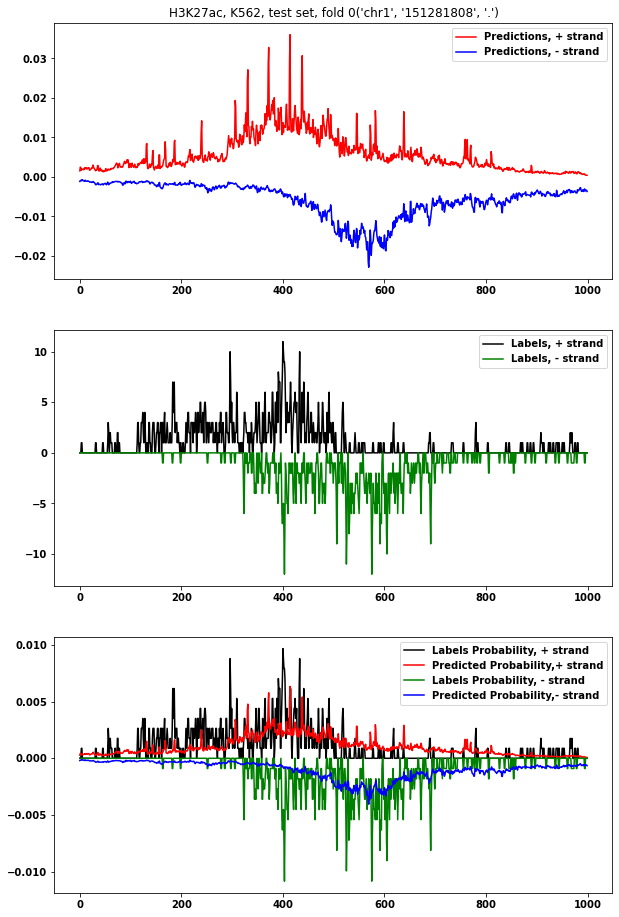

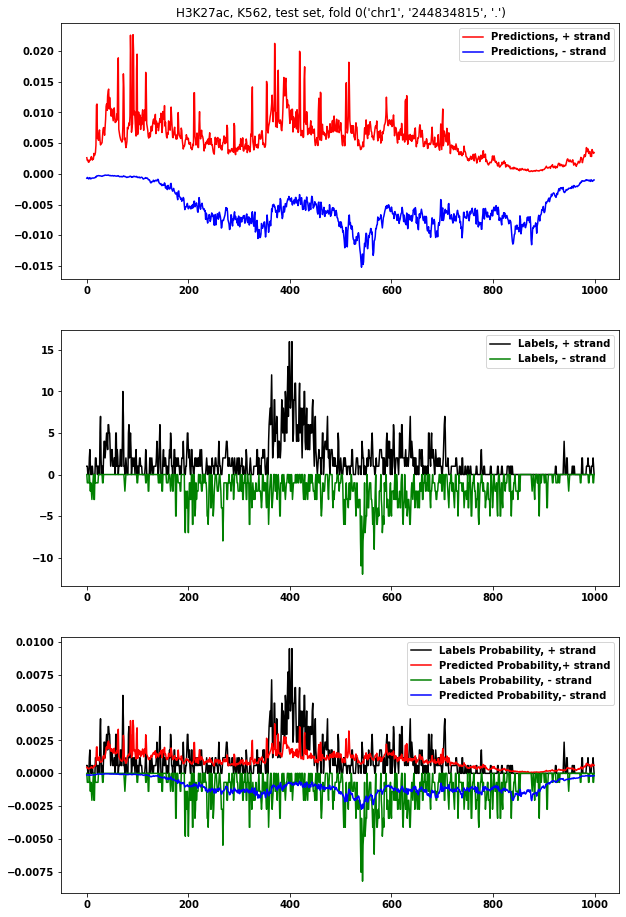

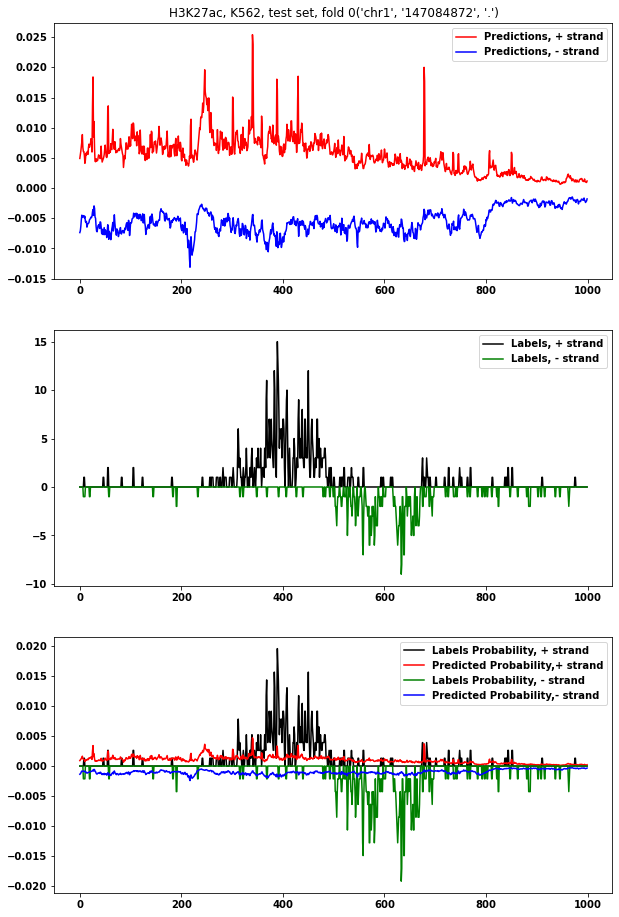

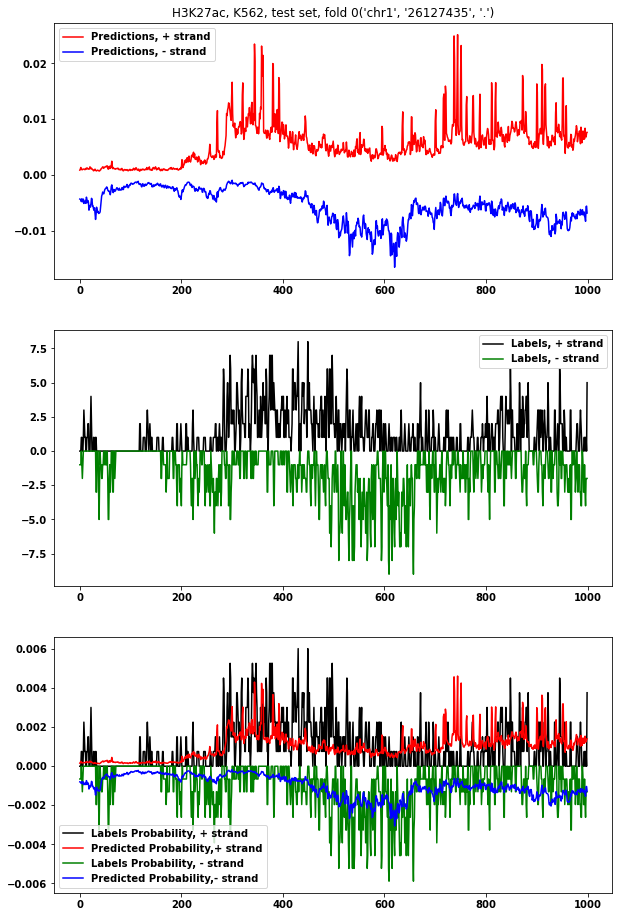

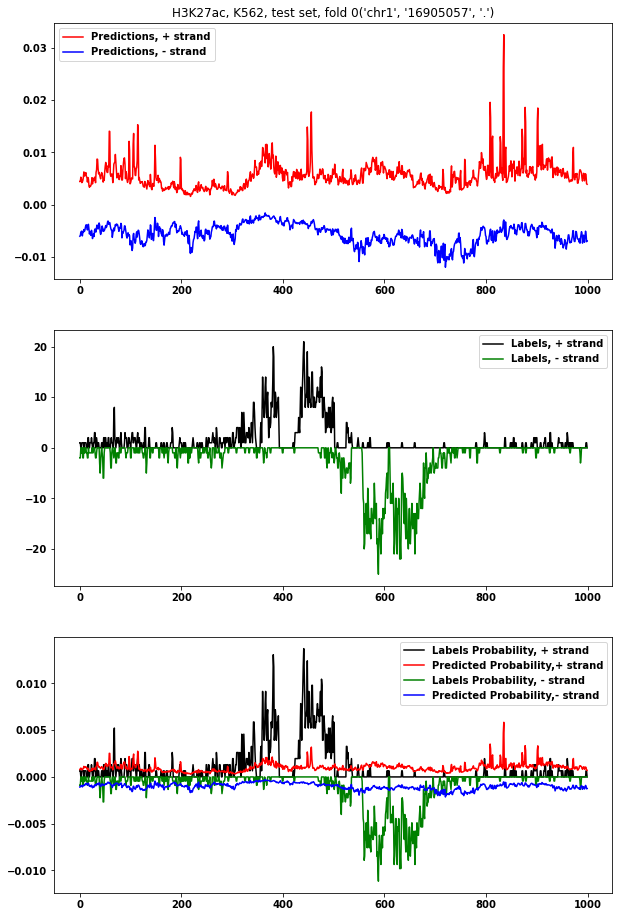

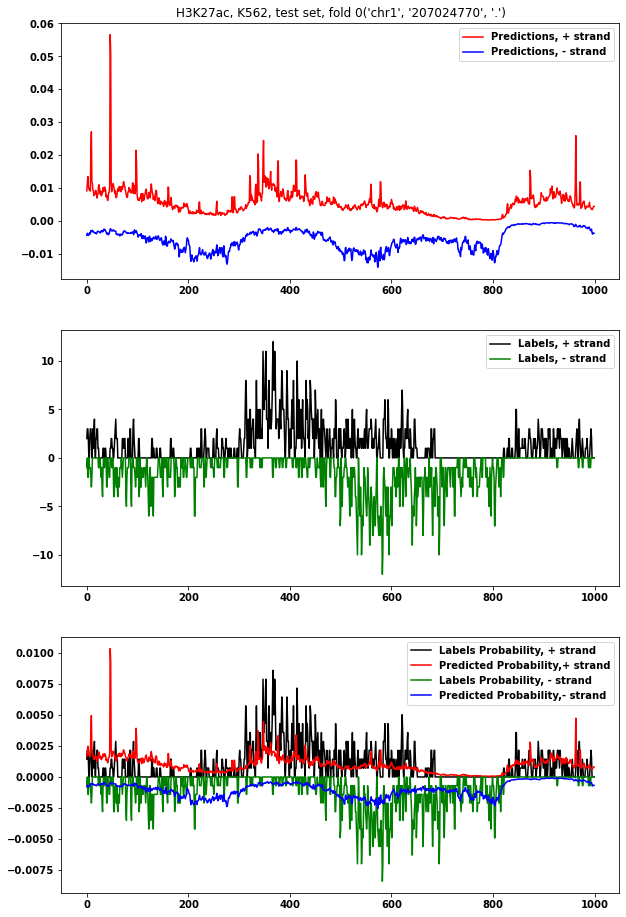

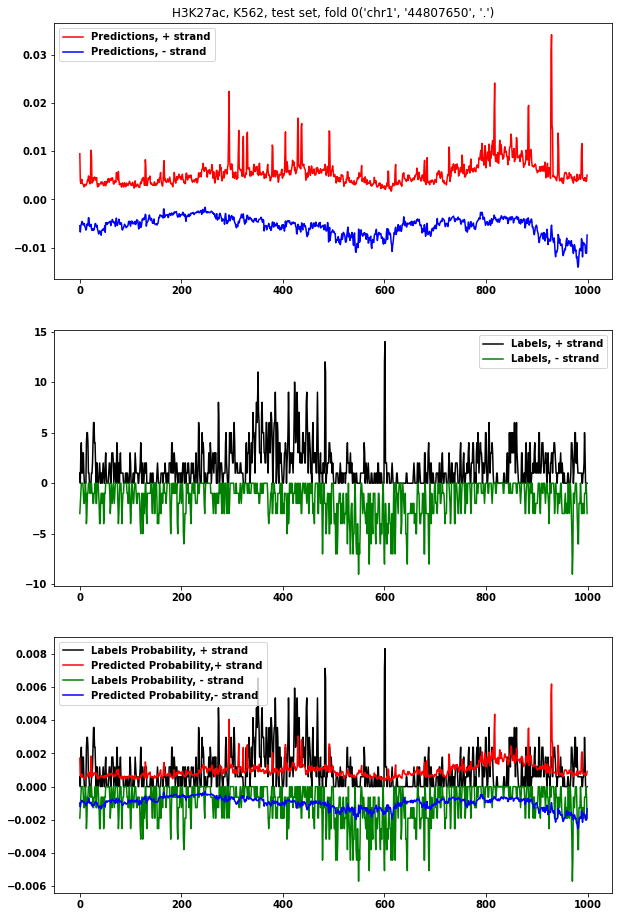

In [93]:
plt.rcParams["figure.figsize"]=10,16
title="H3K27ac, K562, test set, fold 0"
for pos in positions[0:20]: 
    cur_index=coord_dict[pos]
    counts_plus=pred_0_softmax[cur_index,:,0]*pred_1[cur_index,0]
    counts_minus=pred_0_softmax[cur_index,:,1]*pred_1[cur_index,1]
    prob_plus=pred_0_softmax[cur_index,:,0]
    prob_minus=pred_0_softmax[cur_index,:,1]
    fig, axes = plt.subplots(3, 1)
    probs_observed_forward=labels_0[cur_index,:,0]/sum(labels_0[cur_index,:,0])
    probs_observed_reverse=labels_0[cur_index,:,1]/sum(labels_0[cur_index,:,1])
    axes[0].plot(counts_plus,label='Predictions, + strand',color='r')
    axes[1].plot(labels_0[cur_index,:,0],label='Labels, + strand',color='k')
    axes[2].plot(probs_observed_forward,label="Labels Probability, + strand",color='k')
    axes[2].plot(pred_0_softmax[cur_index,:,0],label="Predicted Probability,+ strand",color='r')    
    axes[0].plot(-1*counts_minus,label='Predictions, - strand',color='b')
    axes[1].plot(-1*labels_0[cur_index,:,1],label='Labels, - strand',color='g')
    axes[2].plot(-1*probs_observed_reverse,label="Labels Probability, - strand",color='g')
    axes[2].plot(-1*pred_0_softmax[cur_index,:,1],label="Predicted Probability,- strand",color='b')            
    axes[0].set_title(title+str(pos))
    axes[0].legend()
    axes[1].legend() 
    axes[2].legend()
    plt.show() 
        


In [19]:
f.close()